## Notebook Setup

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [2]:
# Read Data
vcl_data = pd.read_csv('../02_data/02_processed/fraud_oracle_processed.csv')
vcl_data.head()


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,FraudFound_P
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,0,03: 1 year,3 to 4,1994,Liability,0
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,0,01: No change,1,1994,Collision,0
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,0,01: No change,1,1994,Collision,0
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,> 5,01: No change,1,1994,Liability,0
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,0,01: No change,1,1994,Collision,0


In [3]:
X = [*vcl_data.drop(columns = 'FraudFound_P').columns]

In [4]:
# Label Encoder
to_enc = [*vcl_data.select_dtypes('object').columns]

enc = LabelEncoder()


vcl_data_enc = vcl_data.copy()
for column in to_enc:
    vcl_data_enc[column] = enc.fit_transform(vcl_data[column])

vcl_data_enc.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,FraudFound_P
0,2,5,6,6,1,6,5,1,0,2,...,3,0,0,0,0,2,2,1994,2,0
1,4,3,6,6,1,2,5,4,1,2,...,4,1,0,0,0,0,0,1994,1,0
2,10,5,0,6,1,5,10,2,1,1,...,6,0,0,0,0,0,0,1994,1,0
3,6,2,2,17,0,1,6,1,1,1,...,7,1,0,0,3,0,0,1994,2,0
4,4,5,1,6,1,6,4,2,0,2,...,4,0,0,0,0,0,0,1994,1,0


In [5]:
# Standard Scaler
vcl_data_scl = vcl_data_enc.copy()

for column in [*vcl_data_scl.columns]:
    vcl_data_scl[column] = enc.fit_transform(vcl_data_enc[column])

vcl_data_scl.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,FraudFound_P
0,2,4,6,6,1,6,5,0,0,2,...,3,0,0,0,0,2,2,0,2,0
1,4,2,6,6,1,2,5,3,1,2,...,4,1,0,0,0,0,0,0,1,0
2,10,4,0,6,1,5,10,1,1,1,...,6,0,0,0,0,0,0,0,1,0
3,6,1,2,17,0,1,6,0,1,1,...,7,1,0,0,3,0,0,0,2,0
4,4,4,1,6,1,6,4,1,0,2,...,4,0,0,0,0,0,0,0,1,0


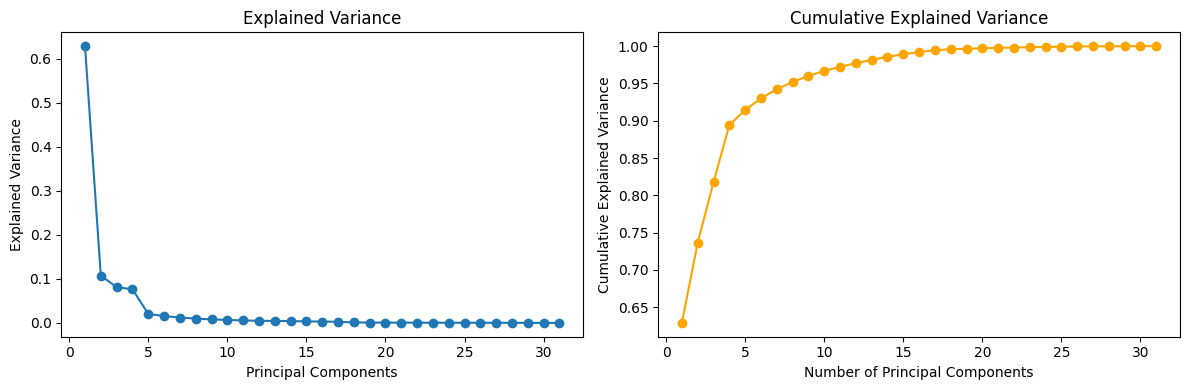

In [6]:
# PCA

pca = PCA()
pca.fit(vcl_data_scl[X])

# Plot explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot explained variance
ax1.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
ax1.set_title('Explained Variance')
ax1.set_xlabel('Principal Components')
ax1.set_ylabel('Explained Variance')

# Plot cumulative explained variance
ax2.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', color='orange')
ax2.set_title('Cumulative Explained Variance')
ax2.set_xlabel('Number of Principal Components')
ax2.set_ylabel('Cumulative Explained Variance')

plt.tight_layout()
plt.show()

In [7]:
# KMeans

pca = PCA(n_components=4)
X_comp = pd.DataFrame(pca.fit_transform(vcl_data_scl[X]), columns = ['Comp_1', 'Comp_2', 'Comp_3', 'Comp_4'])

clu = KMeans(n_clusters = 2)

X_comp['Cluster'] = clu.fit_predict(X_comp)
X_comp.head()

,Comp_1,Comp_2,Comp_3,Comp_4,Cluster
0,-19.573879,4.292707,-2.521098,4.291022,1
1,-6.365981,4.377142,-5.839349,3.592072,1
2,6.855078,4.469559,0.055431,-5.789188,0
3,25.063530,-6.513033,4.357335,-0.812418,0
4,-13.357887,4.339371,6.012317,1.452602,1


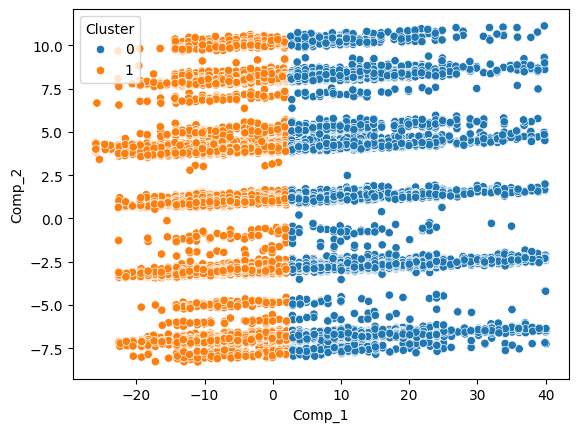

In [8]:
sns.scatterplot(
    data = X_comp,
    x = 'Comp_1',
    y = 'Comp_2',
    hue = 'Cluster'
)

plt.show()

In [9]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Assuming vcl_data_scl contains your scaled features
# If not, you may need to scale your features before applying DBSCAN

# Initialize DBSCAN
dbscan = DBSCAN(eps=3, min_samples=5)

# Fit and predict clusters
clusters = dbscan.fit_predict(X_comp)

# Add cluster labels to your original DataFrame
X_comp['Cluster_DBSCAN'] = clusters

# Check the distribution of clusters
print(X_comp['Cluster_DBSCAN'].value_counts())

# You can now analyze and visualize the clusters in your data

Cluster_DBSCAN
 0    14989
-1      298
 2       60
 3       32
 5       10
 6        8
 1        7
 4        7
 8        6
 7        3
Name: count, dtype: int64


In [104]:
noise_db = X_comp[X_comp['Cluster_DBSCAN'] == -1].index

In [105]:
vcl_data[vcl_data.index.isin(noise_db)]['FraudFound_P'].value_counts()

FraudFound_P
0    294
1     20
Name: count, dtype: int64